# Data Process

* Access Data
* Explore and Process Data
* Extract Insight
* Report Insight

In [2240]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np

# Data type constraints

## string to integers

In [2241]:
data = {
    'SalesOrderID':[1001, 1002],
    'Revenue':['23154$','8748$'],
    'Quantity':[43,3]
}
example_df = pd.DataFrame(data)
example_df.head()

,SalesOrderID,Revenue,Quantity
0,1001,23154$,43
1,1002,8748$,3


In [2242]:
example_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalesOrderID  2 non-null      int64 
 1   Revenue       2 non-null      object
 2   Quantity      2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 176.0+ bytes


In [2243]:
example_df['Revenue'] = example_df['Revenue'].str.strip('$')
example_df['Revenue'] = example_df['Revenue'].astype(int)
example_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalesOrderID  2 non-null      int64
 1   Revenue       2 non-null      int64
 2   Quantity      2 non-null      int64
dtypes: int64(3)
memory usage: 176.0 bytes


In [2244]:
example_df

,SalesOrderID,Revenue,Quantity
0,1001,23154,43
1,1002,8748,3


In [2245]:
assert example_df['Revenue'].dtype == int

In [2246]:
example_df['OnSale'] = [0,1]

In [2247]:
example_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   SalesOrderID  2 non-null      int64
 1   Revenue       2 non-null      int64
 2   Quantity      2 non-null      int64
 3   OnSale        2 non-null      int64
dtypes: int64(4)
memory usage: 192.0 bytes


## number to categorical

In [2248]:
example_df['OnSale'] = example_df['OnSale'].astype('category')

In [2249]:
example_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   SalesOrderID  2 non-null      int64   
 1   Revenue       2 non-null      int64   
 2   Quantity      2 non-null      int64   
 3   OnSale        2 non-null      category
dtypes: category(1), int64(3)
memory usage: 302.0 bytes


In [2250]:
example_df.describe()

,SalesOrderID,Revenue,Quantity
count,2.000000,2.00000,2.000000
mean,1001.500000,15951.00000,23.000000
std,0.707107,10186.58029,28.284271
min,1001.000000,8748.00000,3.000000
25%,1001.250000,12349.50000,13.000000
50%,1001.500000,15951.00000,23.000000
75%,1001.750000,19552.50000,33.000000
max,1002.000000,23154.00000,43.000000


# San Francisco ride sharing data

In [2251]:
ride_sharing = pd.read_csv('/Users/joseservin/DataCamp/Courses/Cleaning_Data/ride_sharing_new.csv')
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male


In [2252]:
ride_sharing['user_type'].describe()

count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64

## converting int to categorical column

In [2253]:
ride_sharing['user_type'] = ride_sharing['user_type'].astype('category')

In [2254]:
assert ride_sharing['user_type'].dtype == 'category'

In [2255]:
ride_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Unnamed: 0       25760 non-null  int64   
 1   duration         25760 non-null  object  
 2   station_A_id     25760 non-null  int64   
 3   station_A_name   25760 non-null  object  
 4   station_B_id     25760 non-null  int64   
 5   station_B_name   25760 non-null  object  
 6   bike_id          25760 non-null  int64   
 7   user_type        25760 non-null  category
 8   user_birth_year  25760 non-null  int64   
 9   user_gender      25760 non-null  object  
dtypes: category(1), int64(5), object(4)
memory usage: 1.8+ MB


In [2256]:
ride_sharing['user_type'].describe() # now describe shows us relevant information about the categorical variable user_type

count     25760
unique        3
top           2
freq      12972
Name: user_type, dtype: int64

## string manipulation to convert object to integer

In [2257]:
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip('minutes')

In [2258]:
ride_sharing

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,duration_trim
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,12
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,24
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,8
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,4
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,11
...,...,...,...,...,...,...,...,...,...,...,...
25755,25755,11 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5063,1,2000,Male,11
25756,25756,10 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,34,Father Alfred E Boeddeker Park,5411,2,1998,Male,10
25757,25757,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),5157,2,1995,Male,14
25758,25758,14 minutes,15,San Francisco Ferry Building (Harry Bridges Pl...,42,San Francisco City Hall (Polk St at Grove St),4438,2,1995,Male,14


In [2259]:
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype(int)

In [2260]:
assert ride_sharing['duration_time'].dtype == 'int'

In [2261]:
ride_sharing['duration_time'].mean()

11.389052795031056

# Data Range Constraints

* Given: rating can be any integer between 1 - 5

In [2262]:
movies = {
    'Movie_Name':['Movie1','Movie2','Movie3','Movie4','Movie5'],
    'avg_rating' : [6,5,3,2,4]
}
movies = pd.DataFrame(movies)
movies

,Movie_Name,avg_rating
0,Movie1,6
1,Movie2,5
2,Movie3,3
3,Movie4,2
4,Movie5,4


In [2263]:
# isolate movies that are out of range
movies[movies['avg_rating'] > 5]

,Movie_Name,avg_rating
0,Movie1,6


<AxesSubplot:xlabel='avg_rating', ylabel='count'>

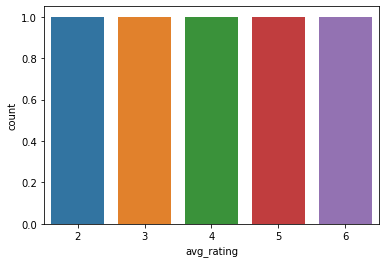

In [2264]:
sns.countplot(x='avg_rating', data=movies)

## Drop values using filtration

In [2265]:
movies = movies[movies['avg_rating'] <= 5]
movies

,Movie_Name,avg_rating
1,Movie2,5
2,Movie3,3
3,Movie4,2
4,Movie5,4


<AxesSubplot:xlabel='avg_rating', ylabel='count'>

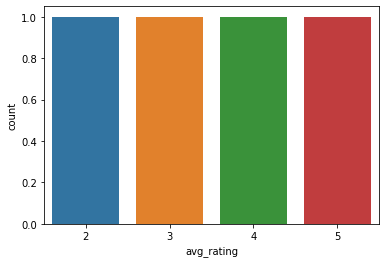

In [2266]:
sns.countplot(x='avg_rating', data=movies)

## Drop values using .drop()

In [2267]:
movies = {
    'Movie_Name':['Movie1','Movie2','Movie3','Movie4','Movie5'],
    'avg_rating' : [6,5,3,2,4]
}
movies = pd.DataFrame(movies)

In [2268]:
movies.drop(movies[movies['avg_rating'] > 5].index, inplace=True)

In [2269]:
assert movies['avg_rating'].max()  <= 5

<AxesSubplot:xlabel='avg_rating', ylabel='count'>

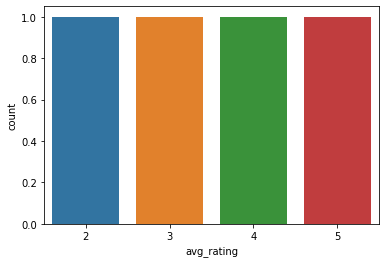

In [2270]:
sns.countplot(x='avg_rating', data=movies)

In [2271]:
sub_dates = {
    'Date':['02/15/2022','02/02/2021','02/18/2026'],
    'Membership_Type':['Gold','Gold','Silver']
}
sub_dates = pd.DataFrame(sub_dates)
sub_dates['Date'] = pd.to_datetime(sub_dates['Date'])
sub_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             3 non-null      datetime64[ns]
 1   Membership_Type  3 non-null      object        
dtypes: datetime64[ns](1), object(1)
memory usage: 176.0+ bytes


## Checking if there are dates in the future

In [2272]:
sub_dates[sub_dates['Date'] > dt.datetime.today()] # need to compare datetime with datetime and not datetime vs date

,Date,Membership_Type
2,2026-02-18,Silver


## Drop data for dates in the future

In [2273]:
sub_dates = sub_dates[sub_dates['Date'] < dt.datetime.today()]
sub_dates

,Date,Membership_Type
0,2022-02-15,Gold
1,2021-02-02,Gold


## Setting hard limits for dates

In [2274]:
sub_dates = {
    'Date':['02/15/2022','02/02/2021','02/18/2026'],
    'Membership_Type':['Gold','Gold','Silver']
}
sub_dates = pd.DataFrame(sub_dates)
sub_dates['Date'] = pd.to_datetime(sub_dates['Date'])

In [2275]:
today = dt.datetime.today()
sub_dates.loc[sub_dates['Date'] > today, 'Date'] = today
sub_dates

,Date,Membership_Type
0,2022-02-15 00:00:00.000000,Gold
1,2021-02-02 00:00:00.000000,Gold
2,2022-02-17 22:20:22.437380,Silver


## Setting hard limits to ranges

In [2276]:
movies = {
    'Movie_Name':['Movie1','Movie2','Movie3','Movie4','Movie5'],
    'avg_rating' : [6,5,3,2,4]
}
movies = pd.DataFrame(movies)

* using loc reads as "for all rows where avg_rating is greater than 5, insert 5 for that row in column avg_rating

In [2277]:
movies.loc[movies['avg_rating']>5 ,'avg_rating'] = 5 # this will change Movie1 to have a rating of 5 instead of 6 since we are setting a hard limit

In [2278]:
movies

,Movie_Name,avg_rating
0,Movie1,5
1,Movie2,5
2,Movie3,3
3,Movie4,2
4,Movie5,4


# Uniqueness Constraints

In [2279]:
members = {
    'first_name':['Jose','Baker','Camila','Bella','Baker','Jose','Baker'],
    'last_name':['Servin','Servin','Servin','Cat','Servin','Servin','Servin'],
    'Age':[25,25,9,8,21,25, 19]
}
members = pd.DataFrame(members)
members

,first_name,last_name,Age
0,Jose,Servin,25
1,Baker,Servin,25
2,Camila,Servin,9
3,Bella,Cat,8
4,Baker,Servin,21
5,Jose,Servin,25
6,Baker,Servin,19


## using duplicated() method with default arguments

In [2280]:
duplicated = members.duplicated() # this will return all occurrences except the first for duplicated values in ALL columns
members[duplicated]

,first_name,last_name,Age
5,Jose,Servin,25


## using duplicated() method with arguments

In [2281]:
col_names = ['first_name','last_name']
duplicated_rows = members.duplicated(subset=col_names, keep=False)
members[duplicated_rows].sort_values('first_name')

,first_name,last_name,Age
1,Baker,Servin,25
4,Baker,Servin,21
6,Baker,Servin,19
0,Jose,Servin,25
5,Jose,Servin,25


## drop duplicates

In [2282]:
members.drop_duplicates(inplace=True) # default action is to drop rows with all duplicated column values which is what you want to do when you have the same entry twice
members

,first_name,last_name,Age
0,Jose,Servin,25
1,Baker,Servin,25
2,Camila,Servin,9
3,Bella,Cat,8
4,Baker,Servin,21
6,Baker,Servin,19


In [2283]:
col_names = ['first_name','last_name']
duplicated_rows = members.duplicated(subset=col_names, keep=False)
members[duplicated_rows].sort_values('first_name')

,first_name,last_name,Age
1,Baker,Servin,25
4,Baker,Servin,21
6,Baker,Servin,19


## using statistical measure to combine duplicated rows

In [2284]:
stat_summaries = {'Age':'mean'}
members = members.groupby(col_names).agg(stat_summaries) # index columns will be columns you group by
members

,,Age
first_name,last_name,
Baker,Servin,21.666667
Bella,Cat,8.000000
Camila,Servin,9.000000
Jose,Servin,25.000000


In [2285]:
stat_summaries = {'Age':'mean'}
members = members.groupby(col_names).agg(stat_summaries).reset_index() # returns index back to numeric values
members

,first_name,last_name,Age
0,Baker,Servin,21.666667
1,Bella,Cat,8.000000
2,Camila,Servin,9.000000
3,Jose,Servin,25.000000


# Membership Constraints

In [2286]:
reported_grades = {
    'name':['Jose','Baker','Camila','Bella'],
    'Grade':['A','B','C','Z']
}
reported_grades = pd.DataFrame(reported_grades)
reported_grades

,name,Grade
0,Jose,A
1,Baker,B
2,Camila,C
3,Bella,Z


In [2287]:
# log of all possible categorical data
grades = ['A','B','C','D','F']
grades = pd.DataFrame(grades, columns=['possible_grades'])
grades

,possible_grades
0,A
1,B
2,C
3,D
4,F


## Finding inconsistent categories

In [2288]:
# first find the values via anti-join to see what values are not in the grade log
inconsistent_grades = set(reported_grades['Grade']).difference(grades['possible_grades'])
inconsistent_grades

{'Z'}

In [2289]:
# find the rows from the DataFrame that are inconsistent
inconsistent_rows = reported_grades['Grade'].isin(inconsistent_grades)
# subset DataFrame with  this boolean series created which holds True for categorical values that are inconsistent
reported_grades[inconsistent_rows]

,name,Grade
3,Bella,Z


## Dropping inconsistent categories

In [2290]:
reported_grades_correct = reported_grades[~inconsistent_rows] # != for DataFrame subsetting
reported_grades_correct

,name,Grade
0,Jose,A
1,Baker,B
2,Camila,C


# Airlines Data

In [2291]:
airlines = pd.read_csv('/Users/joseservin/DataCamp/Courses/Cleaning_Data/airlines_final.csv')
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2477 non-null   int64  
 1   id             2477 non-null   int64  
 2   day            2477 non-null   object 
 3   airline        2477 non-null   object 
 4   destination    2477 non-null   object 
 5   dest_region    2477 non-null   object 
 6   dest_size      2477 non-null   object 
 7   boarding_area  2477 non-null   object 
 8   dept_time      2477 non-null   object 
 9   wait_min       2477 non-null   float64
 10  cleanliness    2477 non-null   object 
 11  safety         2477 non-null   object 
 12  satisfaction   2477 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 251.7+ KB


## fixing columns that should be categorical type

In [2292]:
airlines['cleanliness'] = airlines['cleanliness'].astype('category')
airlines['safety'] = airlines['safety'].astype('category')
airlines['satisfaction'] = airlines['satisfaction'].astype('category')

In [2293]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     2477 non-null   int64   
 1   id             2477 non-null   int64   
 2   day            2477 non-null   object  
 3   airline        2477 non-null   object  
 4   destination    2477 non-null   object  
 5   dest_region    2477 non-null   object  
 6   dest_size      2477 non-null   object  
 7   boarding_area  2477 non-null   object  
 8   dept_time      2477 non-null   object  
 9   wait_min       2477 non-null   float64 
 10  cleanliness    2477 non-null   category
 11  safety         2477 non-null   category
 12  satisfaction   2477 non-null   category
dtypes: category(3), float64(1), int64(2), object(7)
memory usage: 201.5+ KB


In [2294]:
print(airlines['cleanliness'].unique())

['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty']
Categories (5, object): ['Average', 'Clean', 'Dirty', 'Somewhat clean', 'Somewhat dirty']


In [2295]:
print(airlines['safety'].unique())

['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe']
Categories (5, object): ['Neutral', 'Somewhat safe', 'Somewhat unsafe', 'Very safe', 'Very unsafe']


In [2296]:
print(airlines['satisfaction'].unique())

['Very satisfied', 'Neutral', 'Somewhat satsified', 'Somewhat unsatisfied', 'Very unsatisfied']
Categories (5, object): ['Neutral', 'Somewhat satsified', 'Somewhat unsatisfied', 'Very satisfied', 'Very unsatisfied']


In [2297]:
categories = pd.DataFrame(airlines['cleanliness'].unique(), columns=['categories'])
categories

,categories
0,Clean
1,Average
2,Somewhat clean
3,Somewhat dirty
4,Dirty


In [2298]:
cat_diff = set(airlines['cleanliness']).difference(categories['categories'])
cat_diff # this returns an empty set since there are no values that are different from category log

set()

# Categorical Variables

## value consistency

In [2299]:
people = {
    'first_name':['Jose','Baker','Camila','Bella','Baker','Jose','Baker'],
    'status':['online','ONLINE','away',' away','online','meeting','MEETING']
}
people = pd.DataFrame(people)
people

,first_name,status
0,Jose,online
1,Baker,ONLINE
2,Camila,away
3,Bella,away
4,Baker,online
5,Jose,meeting
6,Baker,MEETING


<AxesSubplot:>

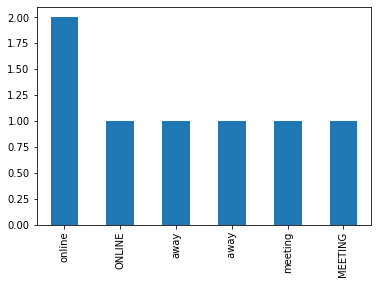

In [2300]:
people['status'].value_counts().plot.bar() # value_counts() only works on a series

In [2301]:
people.groupby('status').count() # groupby and count is used when inspecting value consistency in DataFrames

,first_name
status,
away,1
MEETING,1
ONLINE,1
away,1
meeting,1
online,2


## Fixing categorical values with string case inconsistencies

In [2302]:
people['status'] = people['status'].str.upper()
people['status'].value_counts()

ONLINE     3
MEETING    2
AWAY       1
 AWAY      1
Name: status, dtype: int64

In [2303]:
people['status'] = people['status'].str.lower()
people['status'].value_counts()

online     3
meeting    2
away       1
 away      1
Name: status, dtype: int64

## Fixing categorical values with trailing or leading whitespace

In [2304]:
people['status'] = people['status'].str.strip()

In [2305]:
people['status'].value_counts()

online     3
away       2
meeting    2
Name: status, dtype: int64

## Collapsing data into categories using qcut()

In [2306]:
people = {
    'name':['Jose','Baker','Camila','Bella','Baker','Jose','Baker'],
    'income':[50000,65000,55000,70000,98000,25000,100000]
}
people = pd.DataFrame(people)

In [2307]:
group_names = ['0-70k','70k - 85k','85k - 120k']
people['income_cat'] = pd.qcut(
    people['income'],
    q = 3,
    labels=group_names
)
people

,name,income,income_cat
0,Jose,50000,0-70k
1,Baker,65000,70k - 85k
2,Camila,55000,0-70k
3,Bella,70000,70k - 85k
4,Baker,98000,85k - 120k
5,Jose,25000,0-70k
6,Baker,100000,85k - 120k


## Collapsing data into categories using cut()

In [2308]:
# define ranges and names
ranges = [0, 50000, 85000, np.inf]
names = ['0-50k','50k - 85k','85k+']

# create new category column
people['income_cat_cut'] = pd.cut(
    people['income'],
    bins = ranges,
    labels= names
)

people.sort_values('income')

,name,income,income_cat,income_cat_cut
5,Jose,25000,0-70k,0-50k
0,Jose,50000,0-70k,0-50k
2,Camila,55000,0-70k,50k - 85k
1,Baker,65000,70k - 85k,50k - 85k
3,Bella,70000,70k - 85k,50k - 85k
4,Baker,98000,85k - 120k,85k+
6,Baker,100000,85k - 120k,85k+


## Map categories to fewer ones

In [2309]:
# define map using key equal to current categories and value to new category
mapping = {
    '0-50k':'lower_class',
    '50k - 85k':'middle_class',
    '85k+':'high_class'
}
people['income_cat_cut'] = people['income_cat_cut'].replace(mapping)
people['income_cat_cut'].unique() # this should return 3 values since that how any new values were created from keys in mapping dictionary

['lower_class', 'middle_class', 'high_class']
Categories (3, object): ['lower_class' < 'middle_class' < 'high_class']

In [2310]:
people.sort_values('income')

,name,income,income_cat,income_cat_cut
5,Jose,25000,0-70k,lower_class
0,Jose,50000,0-70k,lower_class
2,Camila,55000,0-70k,middle_class
1,Baker,65000,70k - 85k,middle_class
3,Bella,70000,70k - 85k,middle_class
4,Baker,98000,85k - 120k,high_class
6,Baker,100000,85k - 120k,high_class


# Cleaning text data

In [2311]:
contact_info = {
    'name':['Jose','Baker','Camila','Bella'],
    'phone_number':['123-456-7890', '7131231233', '+1-832-999-9999','01152']
}
contact_info = pd.DataFrame(contact_info)
contact_info

,name,phone_number
0,Jose,123-456-7890
1,Baker,7131231233
2,Camila,+1-832-999-9999
3,Bella,01152


## replace a string character with another

In [2312]:
contact_info['phone_number'] = contact_info['phone_number'].str.replace('+','00')
contact_info

/var/folders/77/ysxyzr2j3zdb588cls576tc00000gn/T/ipykernel_7327/2280590620.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  contact_info['phone_number'] = contact_info['phone_number'].str.replace('+','00')


,name,phone_number
0,Jose,123-456-7890
1,Baker,7131231233
2,Camila,001-832-999-9999
3,Bella,01152


In [2313]:
contact_info['phone_number'] = contact_info['phone_number'].str.replace('-','')
contact_info

,name,phone_number
0,Jose,1234567890
1,Baker,7131231233
2,Camila,0018329999999
3,Bella,01152


## replace a string value with NaN when a condition is not met

In [2314]:
# finding the len of a string (returns series)
digits = contact_info['phone_number'].str.len()
digits

0    10
1    10
2    13
3     5
Name: phone_number, dtype: int64

In [2315]:
contact_info[digits < 10]

,name,phone_number
3,Bella,01152


In [2316]:
# filtering DF based off length of string not or meeting a condition
contact_info.loc[digits < 10, 'phone_number'] = np.nan
contact_info

,name,phone_number
0,Jose,1234567890
1,Baker,7131231233
2,Camila,0018329999999
3,Bella,NaN


In [2317]:
digits = contact_info['phone_number'].str.len()
assert  digits.min() >= 10

## Regular expression

In [2318]:
contact_info = {
    'name':['Jose','Baker','Camila','Bella'],
    'phone_number':['(123)-456-7890', '+(7)31231233', '+1-832-999-9999','01152']
}
contact_info = pd.DataFrame(contact_info)
contact_info

,name,phone_number
0,Jose,(123)-456-7890
1,Baker,+(7)31231233
2,Camila,+1-832-999-9999
3,Bella,01152


In [2319]:
# extracting only digits from text field
contact_info['phone_number'] = contact_info['phone_number'].str.replace(r'\D+','') # replace anything that is not a digit with nothing
contact_info

/var/folders/77/ysxyzr2j3zdb588cls576tc00000gn/T/ipykernel_7327/1746042104.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  contact_info['phone_number'] = contact_info['phone_number'].str.replace(r'\D+','') # replace anything that is not a digit with nothing


,name,phone_number
0,Jose,1234567890
1,Baker,731231233
2,Camila,18329999999
3,Bella,01152
